# Physics 404/604

## Computational Physics (Spring 2020)

## BPB-250

| Instructor | Prof. Zhaohuan Zhu                 |
| ---------- | :--------------------------------- |
| Email      | zhaohuan.zhu@unlv.edu              |
| Website    | http://www.physics.unlv.edu/~zhzhu |
| Office     | BPB 245                            |









# 1. Programing Style: Efficient Algorithm


## 1.1 Programming guide
* Give the correct answers
* clear and easy to read (including documenting itself)
* easy to use
* built up out of small programs that can be tested individually easy to modify and robust  
* Try to use efficient algorithm




## 1.2 Efficient ways to calculate Fibonacci numbers

Fibonacci number
The number series: 1, 1, 2, 3, 5, 8, 13, 21, 34, …
\begin{equation}
F_{n}=F_{n-1}+F_{n-2}
\end{equation}
What is $F_{n}$?


**Dynamic Programming:  
An algorithmic paradigm that solves a complex problem by breaking it into subproblems and stores the results of subproblems to avoid computing the same results again.**

## 1.3.1 Recursion method:

Recursion in computer science is a method of solving a problem where the solution depends on solutions to smaller instances of the same problem.

Most computer programming languages support recursion by allowing a function to call itself from within its own code. 

In [1]:
# Recursion
def fib2(n):      # extremely simple, but exponentially running time, very slow for large n, n cannot too large (stack limit)
    if n == 0: return 0
    elif n == 1: return 1
    else: return fib2(n-1)+fib2(n-2)

In [2]:
import time
start_time = time.time()
print(fib2(40))
print("--- %s seconds ---" % (time.time() - start_time))

102334155
--- 44.900946378707886 seconds ---


## 1.3.2 Memoization method (Top down):

an optimization technique used primarily to speed up computer programs by storing the results of expensive function calls and returning the cached result when the same inputs occur again.

turning [the results of] a function into something to be remembered

In [6]:
# if we have defined an array table = [None]*(n+1)

def fib3(n, table): # Store the data we already calculated, linear space and time complexity, but still have the stack limit
    if n == 0 or n==1:
        table[n]=n
    
    # if the value has not been calculated, calculate it 
    if table[n] is None:
        table[n] = fib3(n-1, table[n-1]) + fib3(n-2, table[n-2]) # try this:  please finish this line using recursive method
        
    return table[n]



In [7]:
import time
n=10
table = [None]*(n+1)
start_time = time.time()
print(fib3(n, table))
print("--- %s seconds ---" % (time.time() - start_time))

# try this: Please calculate time if n=40, 1400, 14000

n=40
table = [None]*(n+1)
start_time = time.time()
print(fib3(n, table))
print("--- %s seconds ---" % (time.time() - start_time))


n=1400
table = [None]*(n+1)
start_time = time.time()
print(fib3(n, table))
print("--- %s seconds ---" % (time.time() - start_time))


n=14000
table = [None]*(n+1)
start_time = time.time()
print(fib3(n, table))
print("--- %s seconds ---" % (time.time() - start_time))

# In programming, the call stack is a buffer that stores requests that need to be handled.

TypeError: 'NoneType' object is not subscriptable

## 1.3.2  Tabulation Method (bottom-up)
Calculate all the values from small to big

In [22]:
# calculate numbers one by one from table[2] to table[n]
import numpy as np


def fib4(n):
    table=[0]*(n+1)
    table[0] = 1
    table[1] = 1
    
    for i in range(2, n+1):
        table[i] = table[i-1] + table[i-2]
    # try this: please finish the following two lines calcuating table[i] from table[i-1] and table[i-2]
            
        
    return table[n] 

In [24]:
import time
start_time = time.time()
print(fib4(40))
print("--- %s seconds ---" % (time.time() - start_time))
start_time = time.time()
print(fib4(1400))
print("--- %s seconds ---" % (time.time() - start_time))
start_time = time.time()
print(fib4(14000)) 
print("--- %s seconds ---" % (time.time() - start_time))

165580141
--- 0.0 seconds ---
27682097123729003105677626449505746191732174241149462650923690069660131404640833946850969379619575819465246124164576690629246144675379393573106211382631761722558988596174542778374560842981861789646519389087106627252306193512024601313327314953992743800841043870569935864482663072626507327493026
--- 0.0010001659393310547 seconds ---
48580965057465408346692062974722924204091728616391165033575131030495600975584383486644535988071014338742970632264621877831665380775476059672840089882938480061502885895878237865892798290081158295795581212226630996515845733344795465038299847763278233924851960346382728957561046602098428504707764846980657021745027208871201828688578731394708286646556242377381666033797429184526073427275185530095056421202174884238935319537221444251740448015889828217094269035914891299829743368785707933018769429101718879453965487260238840132247503085354383552333090689889556339920336019361173064424144165358773113368512445476668772182595825799554474370005664

## 1.3.3 Using Matrix Algebra (Optional)

$$\left[\begin{array}
{rr}
1 & 1 \\
1 & 0 \\
\end{array}\right]^n=\left[\begin{array}
{rr}
F(n+1) & F(n) \\
F(n) & F(n-1) \\
\end{array}\right]
$$

To calculate F(100), need $A^{100}$ -> $(A^{50})^2$->$A^{25}$->$A^{12}$->$A^6$->$A^3$->$A^1$

In [28]:
def arrpow(arr, n):
    yarr=arr
    if n<1:
        print('n needs to be larger than 1')
    if n==1:
        return arr
    yarr = arrpow(arr, n//2)
    yarr = [[yarr[0][0]*yarr[0][0]+yarr[0][1]*yarr[1][0],yarr[0][0]*yarr[0][1]+yarr[0][1]*yarr[1][1]],
            [yarr[1][0]*yarr[0][0]+yarr[1][1]*yarr[1][0],yarr[1][0]*yarr[0][1]+yarr[1][1]*yarr[1][1]]]
    if n%2:
        yarr=[[yarr[0][0]*arr[0][0]+yarr[0][1]*arr[1][0],yarr[0][0]*arr[0][1]+yarr[0][1]*arr[1][1]],
            [yarr[1][0]*arr[0][0]+yarr[1][1]*arr[1][0],yarr[1][0]*arr[0][1]+yarr[1][1]*arr[1][1]]]
    return yarr

def fib5(n):
    arr= [[1,1],[1,0]]
    f=arrpow(arr,n-1)[0][0]
    return f
    



In [13]:
import time
start_time = time.time()
print(fib5(40))
print("--- %s seconds ---" % (time.time() - start_time))
import time
start_time = time.time()
print(fib5(14000)) # 93 overflow
print("--- %s seconds ---" % (time.time() - start_time))

102334155
--- 0.0003170967102050781 seconds ---
3002468761178461090995494179715025648692747937490792943468375429502230242942284835863402333575216217865811638730389352239181342307756720414619391217798542575996541081060501905302157019002614964717310808809478675602711440361241500732699145834377856326394037071666274321657305320804055307021019793251762830816701587386994888032362232198219843549865275880699612359275125243457132496772854886508703396643365042454333009802006384286859581649296390803003232654898464561589234445139863242606285711591746222880807391057211912655818499798720987302540712067959840802106849776547522247429904618357394771725653253559346195282601285019169360207355179223814857106405285007997547692546378757062999581657867188420995770650565521377874333085963123444258953052751461206977615079511435862879678439081175536265576977106865074099512897235100538241196445815568291377846656352979228098911566675956525644182645608178603837172227838896725425605719942300037650526231486881066037

# 2. the complexity of the algorithms

Algorithm complexity is a measure which evaluates the order of the count of operations, performed by a given or algorithm as a function of the size of the input data. To put this simpler, complexity is a rough approximation of the number of steps necessary to execute an algorithm. When we evaluate complexity we speak of order of operation count, not of their exact count. 

For example if we have an order of $N^2$ operations to process N elements, then $N^2$/2 and 3*$N^2$ are of one and the same quadratic order.

Algorithm complexity is commonly represented with the O(f) notation e.g. O($N^2$)

In [25]:
import numpy as np
n2=np.arange(1,41,3)
time2=np.zeros(n2.size)
for i in range(n2.size):
    start_time = time.time()
    temp=fib2(n2[i])
    time2[i] = time.time()-start_time
    print(n2[i],time2[i])


1 0.0
4 0.0
7 0.0
10 0.0
13 0.0010008811950683594
16 0.001999378204345703
19 0.00900125503540039
22 0.0410001277923584
25 0.14599871635437012
28 0.6080365180969238
31 2.7029616832733154
34 11.104896783828735
37 47.62162137031555


KeyboardInterrupt: 

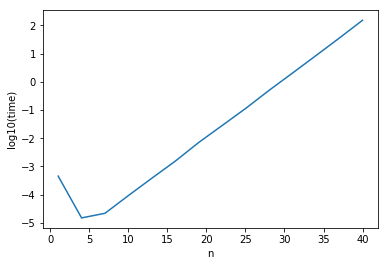

In [16]:
import matplotlib.pyplot as plt
import math
plt.plot(n2,np.log10(time2))
plt.xlabel('n')
plt.ylabel('log10(time)')
plt.show()

In [26]:
# try this: following the above example to calculate the time if n=n2[0], n2[1]...., and make a plot for log10(time) vs n
# for fib4

n2=np.arange(100,100000,100)
time2=np.zeros(n2.size)
for i in range(n2.size):
    start_time = time.time()
    temp=fib4(n2[i])
    time2[i] = time.time()-start_time
    print(n2[i],time2[i])


100 0.0020024776458740234
200 0.0
300 0.0
400 0.0
500 0.0
600 0.0009975433349609375
700 0.0
800 0.0
900 0.0
1000 0.001005411148071289
1100 0.0
1200 0.0
1300 0.0009944438934326172
1400 0.0
1500 0.0
1600 0.0010075569152832031
1700 0.0
1800 0.0009920597076416016
1900 0.0
2000 0.0010006427764892578
2100 0.0
2200 0.00099945068359375
2300 0.0010094642639160156
2400 0.0010066032409667969
2500 0.0009913444519042969
2600 0.0010008811950683594
2700 0.000997781753540039
2800 0.000997781753540039
2900 0.0
3000 0.0009984970092773438
3100 0.000997781753540039
3200 0.0010068416595458984
3300 0.0019981861114501953
3400 0.001050710678100586
3500 0.0009441375732421875
3600 0.0010170936584472656
3700 0.0009856224060058594
3800 0.0020134449005126953
3900 0.0009930133819580078
4000 0.0020067691802978516
4100 0.0010082721710205078
4200 0.001001119613647461
4300 0.0009889602661132812
4400 0.002002239227294922
4500 0.0019979476928710938
4600 0.002003192901611328
4700 0.001996278762817383
4800 0.00100088119506

32800 0.030002355575561523
32900 0.03200531005859375
33000 0.034012794494628906
33100 0.032982587814331055
33200 0.03299665451049805
33300 0.034999847412109375
33400 0.03599977493286133
33500 0.035001516342163086
33600 0.031996965408325195
33700 0.03500056266784668
33800 0.033998966217041016
33900 0.03304028511047363
34000 0.0379641056060791
34100 0.0540010929107666
34200 0.03596854209899902
34300 0.035997867584228516
34400 0.03803062438964844
34500 0.03299832344055176
34600 0.033039093017578125
34700 0.03496265411376953
34800 0.038002729415893555
34900 0.033997535705566406
35000 0.03403759002685547
35100 0.03497505187988281
35200 0.03399062156677246
35300 0.034002065658569336
35400 0.04099535942077637
35500 0.058039188385009766
35600 0.039968252182006836
35700 0.04199361801147461
35800 0.037000417709350586
35900 0.037999868392944336
36000 0.03700065612792969
36100 0.03900003433227539
36200 0.03800201416015625
36300 0.03599739074707031
36400 0.03800177574157715
36500 0.0369992256164550

64600 0.08196806907653809
64700 0.08499884605407715
64800 0.08400416374206543
64900 0.08299660682678223
65000 0.08203387260437012
65100 0.08596563339233398
65200 0.08400225639343262
65300 0.08603119850158691
65400 0.08296704292297363
65500 0.07999825477600098
65600 0.08103275299072266
65700 0.07899808883666992
65800 0.08202719688415527
65900 0.08497309684753418
66000 0.0850365161895752
66100 0.08396744728088379
66200 0.08602714538574219
66300 0.08397150039672852
66400 0.08300018310546875
66500 0.08304286003112793
66600 0.08295440673828125
66700 0.08503580093383789
66800 0.0869913101196289
66900 0.08501052856445312
67000 0.08496379852294922
67100 0.08703470230102539
67200 0.10796570777893066
67300 0.1620159149169922
67400 0.09198331832885742
67500 0.09500288963317871
67600 0.09099555015563965
67700 0.0859994888305664
67800 0.08400082588195801
67900 0.0820317268371582
68000 0.08896899223327637
68100 0.09100174903869629
68200 0.0879666805267334
68300 0.0910024642944336
68400 0.08799672126

96500 0.16600346565246582
96600 0.16999435424804688
96700 0.16499972343444824
96800 0.15903615951538086
96900 0.15996408462524414
97000 0.16399812698364258
97100 0.16800761222839355
97200 0.16399693489074707
97300 0.16599607467651367
97400 0.1659994125366211
97500 0.16503500938415527
97600 0.16896939277648926
97700 0.1730029582977295
97800 0.22099518775939941
97900 0.32804179191589355
98000 0.16796088218688965
98100 0.1699988842010498
98200 0.16899776458740234
98300 0.1700119972229004
98400 0.16998720169067383
98500 0.17197370529174805
98600 0.17403292655944824
98700 0.1750023365020752
98800 0.17696380615234375
98900 0.18300175666809082
99000 0.17199921607971191
99100 0.16603684425354004
99200 0.1750020980834961
99300 0.17599821090698242
99400 0.1730034351348877
99500 0.17597270011901855
99600 0.17502593994140625
99700 0.18796396255493164
99800 0.18003416061401367
99900 0.17699575424194336


<ipython-input-27-3f7455e7abf6>:3: RuntimeWarning: divide by zero encountered in log10
  plt.plot(np.log10(n2),np.log10(time2))


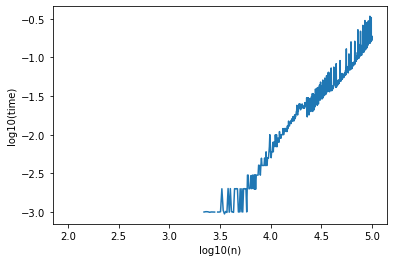

In [27]:
import matplotlib.pyplot as plt
import math
plt.plot(np.log10(n2),np.log10(time2))
plt.xlabel('log10(n)')
plt.ylabel('log10(time)')
plt.show()

In [29]:
# matrix method
n2=np.arange(1000,1000000,1000)
time2=np.zeros(n2.size)
for i in range(n2.size):
    start_time = time.time()
    temp=fib5(n2[i])
    time2[i] = time.time()-start_time


<ipython-input-30-0257556c25d8>:2: RuntimeWarning: divide by zero encountered in log10
  plt.plot(np.log10(n2),np.log10(time2))


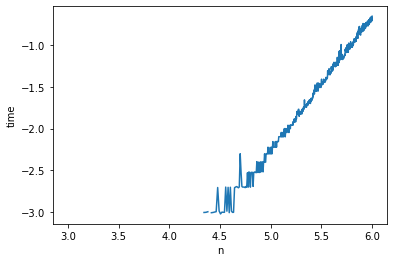

In [30]:
import matplotlib.pyplot as plt
plt.plot(np.log10(n2),np.log10(time2))
plt.xlabel('n')
plt.ylabel('time')
plt.show()